## Plot spike trains
-------

Example notebook demonstrating simple functions in SynapticConn for plotting spike trains. 

In [1]:
import os
import pathlib

import numpy as np
import pandas as pd
import scipy.io

os.chdir('../..')
print(os.getcwd())

from synapticonn.plots import plot_acg


/Users/michael.zabolocki/Desktop/code/SynaptiConn


Load data. 

In [2]:
data_fpath = pathlib.Path('tests', 'all_unit.mat')
all_units = scipy.io.loadmat(data_fpath)
all_units.keys()

dict_keys(['__header__', '__version__', '__globals__', 'unit_t'])

Plot spike train.

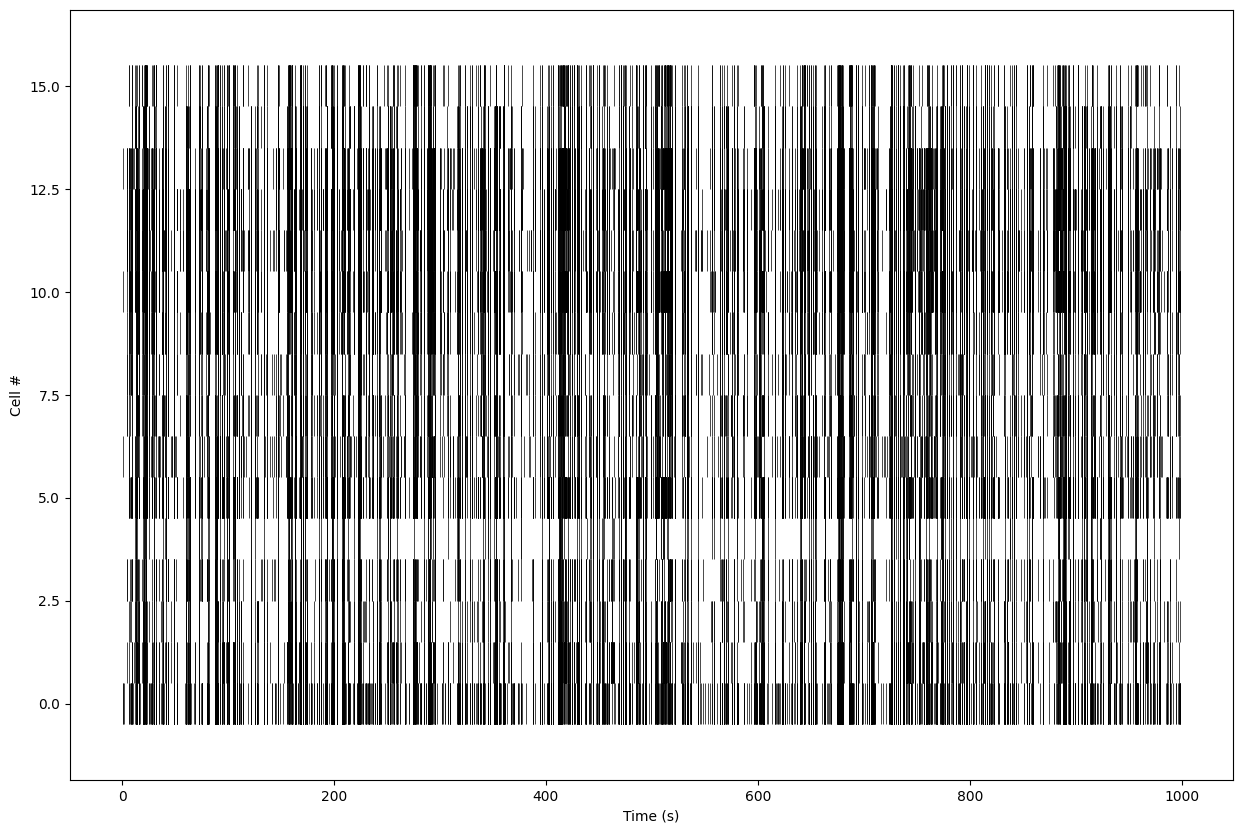

In [52]:
import matplotlib.pyplot as plt

n_cells = all_units['unit_t'].shape[1]

# plot spike trains for each cell
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for cell in range(n_cells):
    ax.eventplot(all_units['unit_t'][0][cell].T, lineoffsets=cell, colors='k', linewidths=0.5)
    
# axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Cell #')

plt.show()

Plot autocorrelograms for individual cells.

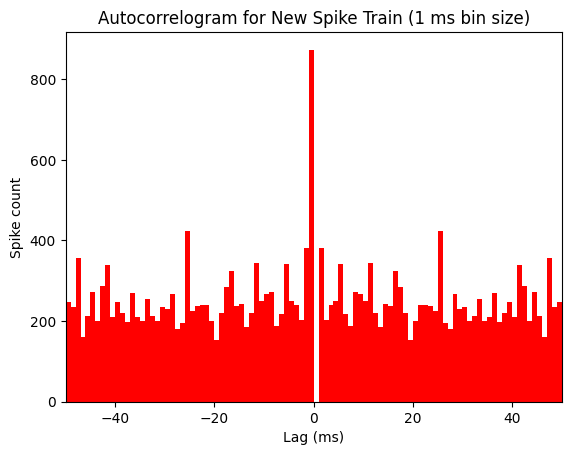

In [166]:
# parameters for autocorrelogram
bin_size_ms = 1  # 1 ms bin size
max_lag_ms = 100   # 100 ms max lag
cell_number = 4

# Provided spike train
spike_train_new = all_units['unit_t'][0][cell_number].flatten()

def compute_autocorrelogram(spike_train, bin_size_ms=1, max_lag_ms=100):
    """
    Compute the autocorrelogram of a spike train.
    
    Parameters:
    spike_train (array): Array of spike times (in ms)
    bin_size_ms (int): Size of the bin in milliseconds (default is 1 ms)
    max_lag_ms (int): Maximum lag in milliseconds for the autocorrelogram (default is 100 ms)
    
    Returns:
    lags (array): Lag values for the autocorrelogram
    autocorr (array): Autocorrelogram values
    """
    # Convert max_lag and bin_size to bins
    max_lag_bins = int(max_lag_ms / bin_size_ms)
    
    # Compute the differences between all spike times
    spike_diffs = np.subtract.outer(spike_train, spike_train)
    
    # Only keep differences within the maximum lag
    spike_diffs = spike_diffs[np.abs(spike_diffs) <= max_lag_ms]
    
    # Compute histogram (binning the differences)
    autocorr, bin_edges = np.histogram(spike_diffs, bins=np.arange(-max_lag_ms, max_lag_ms + bin_size_ms, bin_size_ms))
    
    # Remove the zero-lag bin (since it's the same spike)
    zero_bin = int(len(autocorr) // 2)
    autocorr[zero_bin] = 0
    
    # Compute lag values
    lags = bin_edges[:-1] + bin_size_ms / 2
    
    return lags, autocorr

# Compute autocorrelogram with a smaller bin size (1 ms)
lags_new_finer, autocorr_new_finer = compute_autocorrelogram(spike_train_new, bin_size_ms=bin_size_ms, max_lag_ms=max_lag_ms)

# Plot the autocorrelogram with finer binning
plt.bar(lags_new_finer, autocorr_new_finer, width=bin_size_ms, color='red', align='center')
plt.xlabel('Lag (ms)')
plt.ylabel('Spike count')
plt.title('Autocorrelogram for New Spike Train (1 ms bin size)')

# set xlim
plt.xlim(-50, 50)

plt.show()

TO DO: 
- Plot for multiple spike trains
    - option to subselect for only 1



- Quality controls
    - Build in quality controls to assess the refractory periods (isi violations)
    - Additional QCs?